In [4]:
!pip install bar-chart-race


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('dataset.csv', encoding='ascii')

print(df.head())
print(df.info())
df.describe()

   VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


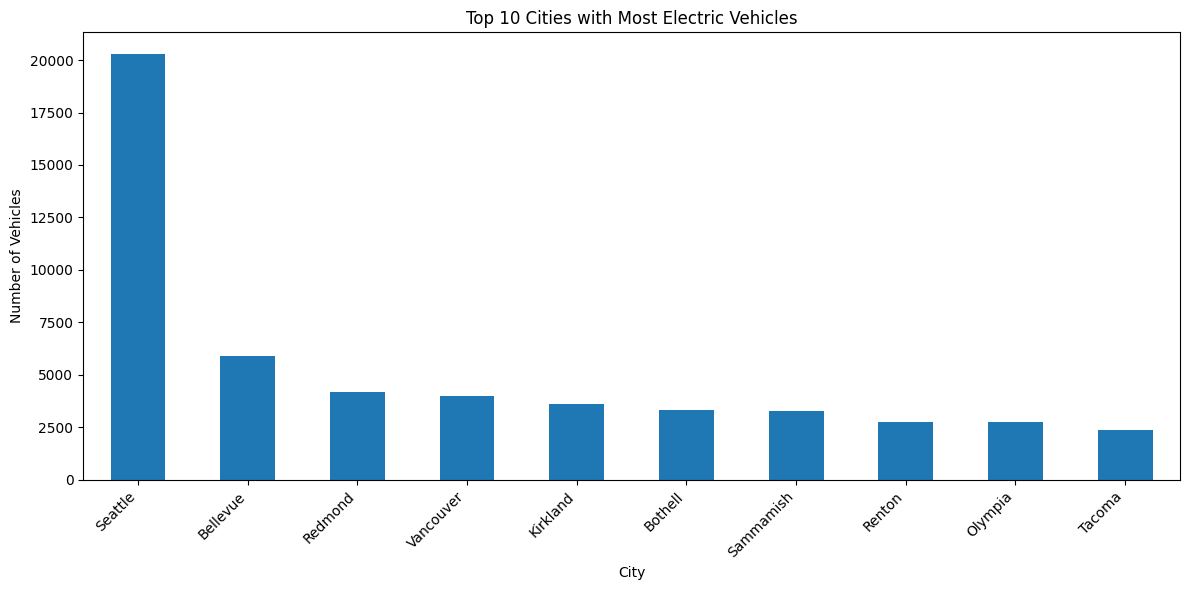

In [6]:
# Top 10 Cities with Most Electric Vehicles
plt.figure(figsize=(12, 6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

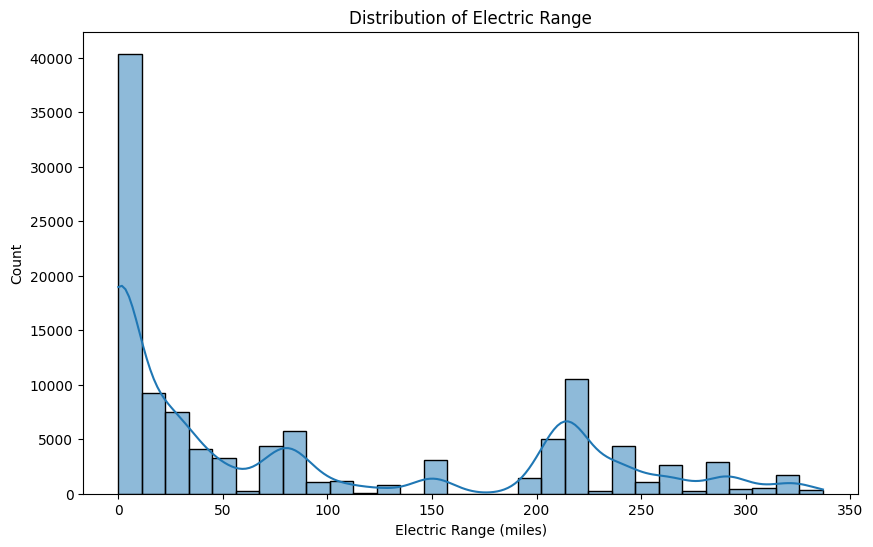

In [7]:
# Electric Range Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], kde=True, bins=30)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Count')
plt.show()

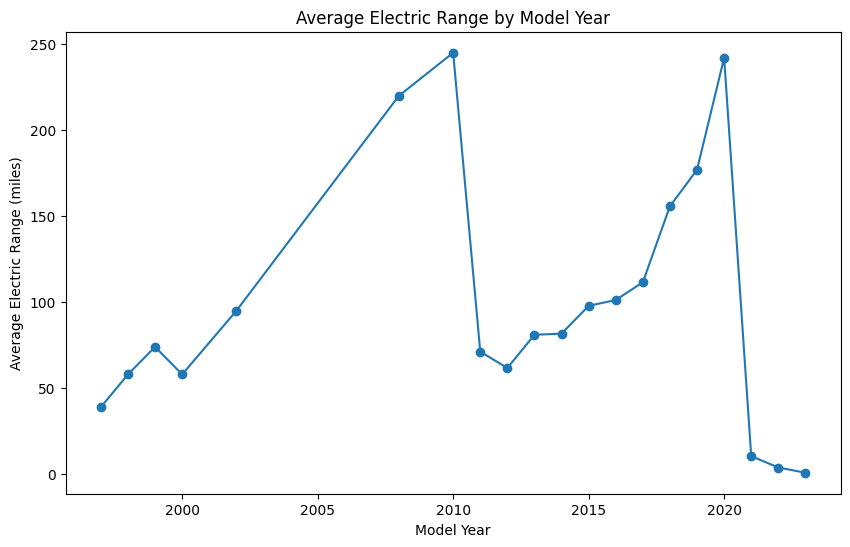

In [8]:
# Average Electric Range by Year
avg_range_by_year = df.groupby('Model Year')['Electric Range'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_range_by_year.plot(kind='line', marker='o')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.show()

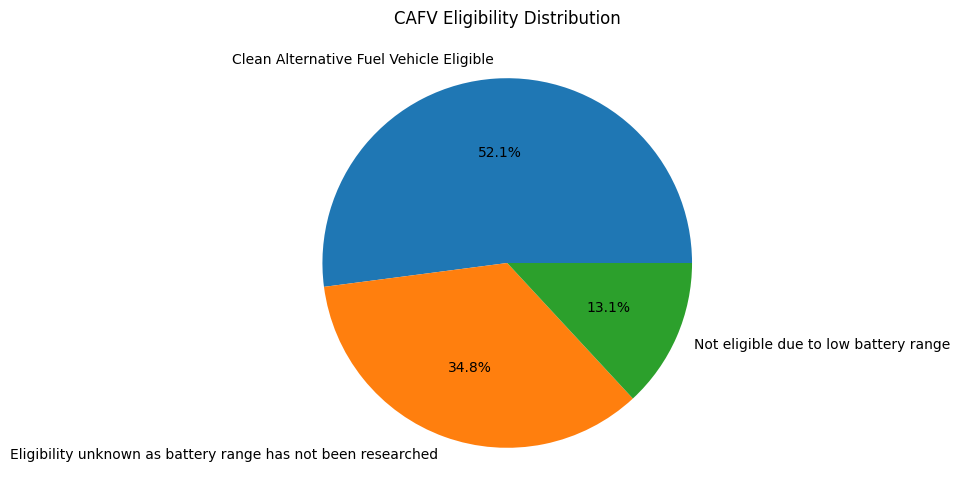

In [9]:
# CAFV Eligibility Distribution
plt.figure(figsize=(8, 6))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('CAFV Eligibility Distribution')
plt.ylabel('')
plt.show()

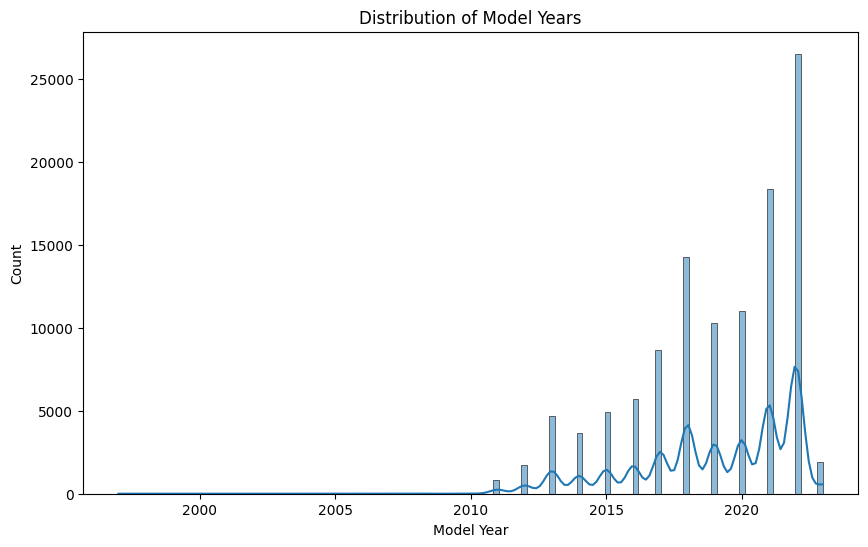

In [10]:
# Distribution of Model Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], kde=True)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

In [11]:
# Additional statistics
print("Some additional statistics:")
print(f"Total number of unique makes: {df['Make'].nunique()}")
print(f"Total number of unique models: {df['Model'].nunique()}")
print(f"Year range: {df['Model Year'].min()} - {df['Model Year'].max()}")
print(f"Average electric range: {df['Electric Range'].mean():.2f} miles")

Some additional statistics:
Total number of unique makes: 34
Total number of unique models: 114
Year range: 1997 - 2023
Average electric range: 87.81 miles


In [25]:
# Choropleth map
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Number of Electric Vehicles by State")
fig.show()

In [13]:
# Racing Bar Plot animation
ev_counts_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
fig = px.bar(ev_counts_by_year,
             x='Count',
             y='Make',
             color='Make',
             animation_frame='Model Year',
             orientation='h',
             range_x=[0, ev_counts_by_year['Count'].max() + 1000],
             title='EV Make Counts Over the Years')
fig.show()

In [14]:
import bar_chart_race as bcr

ev_counts_by_year = df.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

bcr.bar_chart_race(df=ev_counts_by_year,
                   n_bars=10,
                   steps_per_period=45,
                   period_length=3000,
                   figsize=(7, 4),
                   dpi=120,
                   title='Electric Vehicle Make Count Over Years',
                   period_label={'x': .95, 'y': .1, 'ha': 'right', 'va': 'center', 'size': 15, 'weight': 'semibold'},
                   bar_label_size=10,
                   tick_label_size=10,
                   bar_kwargs={'alpha': .99, 'lw': 0},
                   period_fmt='{x:.0f}')



/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

